**Сервис аренды самокатов GoFast**

В данном нам проекты мы выполним следущие шаги: загрузим данные, выполним предобработку, исследуем анализ данных и объеденим, посчитаем вырочку и проверим гипотезы.

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Шаг 1. Загрузка данных

In [2]:
#Читаем CSV-файлы с данными
data = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
#выводим строки
data.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
#смотрим инфу
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В загруженном фрейме отсутствуют пропущенные значения. Типы данных соответсвуют содержанию.

In [5]:
#Читаем CSV-файлы с данными
data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
#выводим строки
data_2.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
#смотрим инфу
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В загруженном фрейме отсутствуют пропущенные значения. 
Колонка **date** имеет тип *object*. Это не совсем не соответствует содержанию. Тип данных будет изменён позже, в ходе работы над проектом.

In [7]:
#Читаем CSV-файлы с данными
data_3 = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')
#выводим строки
data_3.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
#смотрим инфу
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Совсем мальникий набор данных.

**Вывод:**  
**data** - В загруженном фрейме отсутствуют пропущенные значения. Типы данных соответсвуют содержанию.
**data_2** - В загруженном фрейме отсутствуют пропущенные значения. Колонка date имеет тип object. Это не совсем не соответствует содержанию. Тип данных будет изменён позже, в ходе работы над проектом.
**data_3** - Совсем мальникий набор данных.

#### Шаг 2. Предобработка данных

In [9]:
#преобразуем столбец date в Pandas
data_2['date'] = pd.to_datetime(data_2['date'], format='%Y-%m-%d')
#проверяем
data_2.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

In [12]:
#добавляем столбец month
data_2['month'] = pd.DatetimeIndex(data_2['date']).month
data_2.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [13]:
#проверяем наличие пропущенных значений 
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
data_2.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [15]:
data_3.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков в данных нет.

In [16]:
#проверяем дубликаты
data.duplicated().sum()

31

In [17]:
#удаляем дубликаты
data = data.drop_duplicates()


In [18]:
data_2.duplicated().sum()

0

In [19]:
data_3.duplicated().sum()

0

**Вывод:** Пропусков в данных нет. Дубликаты удалены.

#### Шаг 3. Исследовательский анализ данных

Изучаем параметры

In [20]:
data.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


In [21]:
data_2.describe()

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


In [22]:
data_3.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Опишем и визуализируем общую информацию о пользователях и поездках:

Частота встречаемости городов - city

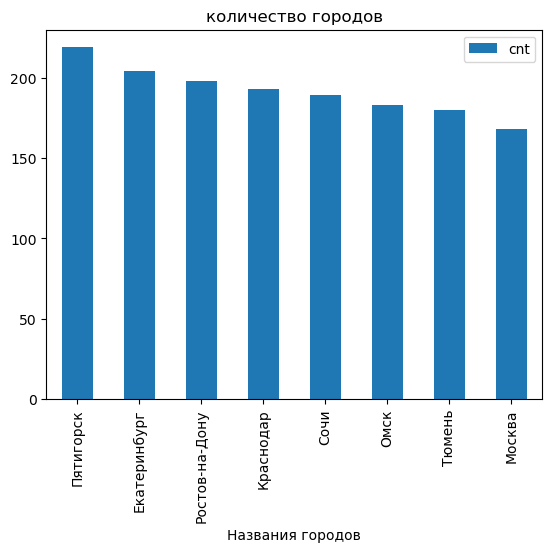

In [23]:
df_city = data['city'].value_counts().reset_index()
df_city.columns = ["city", "cnt"]
df_city.plot.bar(x="city", y="cnt")
plt.title('количество городов');
plt.xlabel('Названия городов');

**Вывод:** Больше всего пользователей самокатов в городе Пятигорск, далее Екатеринбург и 3-е место Ростов на Дону. 

Соотношение пользователей с подпиской и без подписки - subscription_type

In [24]:
data["subscription_type"].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

In [25]:
data["subscription_type"].value_counts(normalize=True)

free     0.544329
ultra    0.455671
Name: subscription_type, dtype: float64

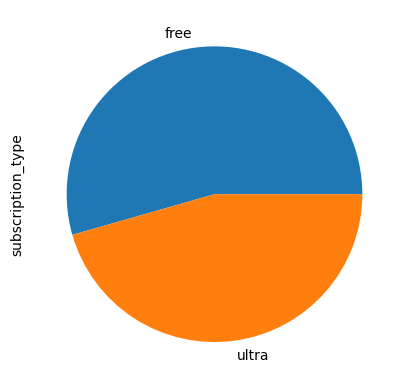

In [26]:
data.groupby(by='subscription_type')['subscription_type'].count().plot(kind='pie');

**Вывод:**  
Как видим на графике, пользователей без подписки немного больше половины - 54%(835 польз.) против 45%(699 пользователей с подпиской ultra).

Возраст пользователей - age

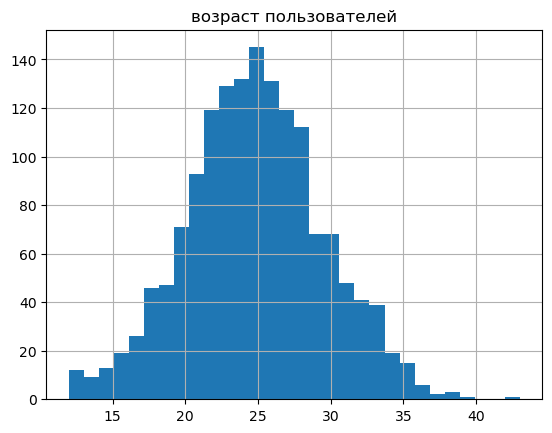

In [27]:
data['age'].hist(bins=30);
plt.title('возраст пользователей');

Больше всего пользователей, которые пользуются услугами самокатов, люди 25 лет. Меньше пользователей от 30 лет.

Расстояние, которое пользователь преодолел за одну поездку - distance

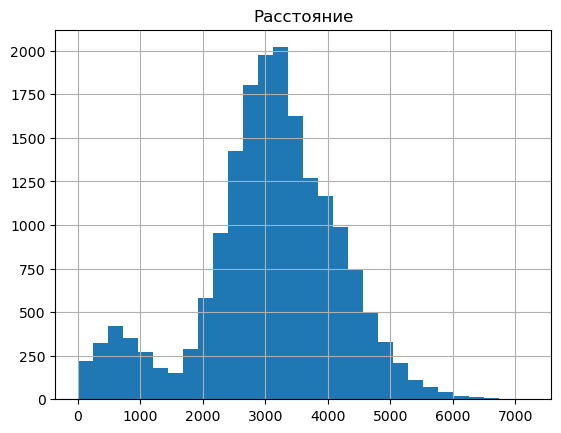

In [28]:
data_2['distance'].hist(bins=30);
plt.title('Расстояние');

Расстояние которое пользователь самоката преодалел за одну поездку это 3000 метров.

Продолжительность поездок - duration

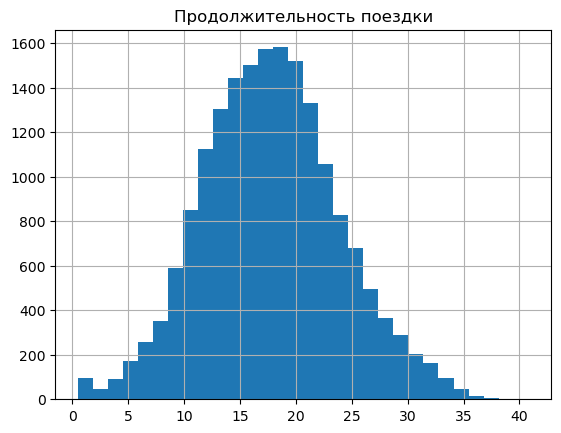

In [29]:
data_2['duration'].hist(bins=30);
plt.title('Продолжительность поездки');

Продолжительность поездки в среднем занимает от 15 до 20 минут.

**Вывод:** Больше всего пользовтелей самокатов в городе Пятигорске, Екатеринбурге и Ростове на Дону. Большая часть пользователй в возрасте 25 лет. Не имеющие подписку на приложение. Проезжают за поездку чуть больше 3000 метров. И продолжительность поездки занимает от 15 до 20 минут. 

#### Шаг 4. Объединение данных

In [30]:
#объединим данные о пользователях, поездках и подписках в один датафрейм
data_stg = pd.merge(data, data_2, on='user_id', how='inner')
# + подписка
data_result = pd.merge(data_stg, data_3, on='subscription_type', how='inner')
data_result.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [31]:
#проверяем пропуски
data_result.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков нет

In [32]:
#создаем ещё два датафрейма из датафреймо: c данными о пользователях без подписки и с данными о пользователях с подпиской
data_ultra = data_result.query("subscription_type == 'ultra'")
data_free = data_result.query("subscription_type == 'free'")

In [33]:
data_ultra.shape

(6500, 12)

In [34]:
data_free.shape

(11568, 12)

In [35]:
data_free.shape[0] + data_ultra.shape[0]

18068

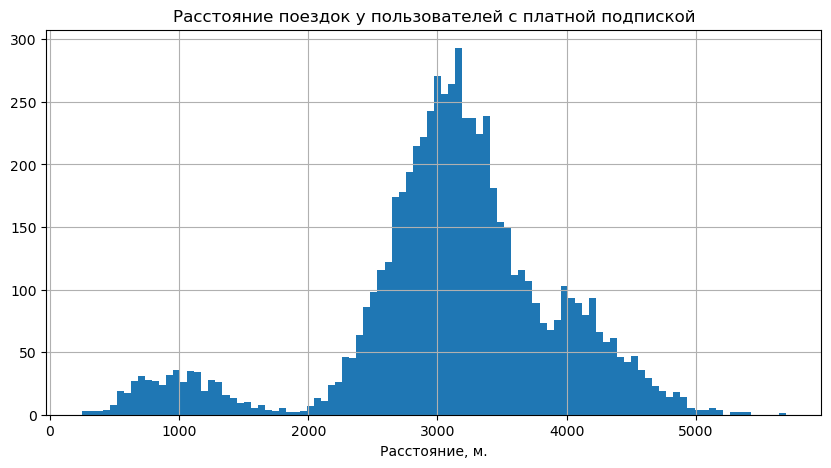

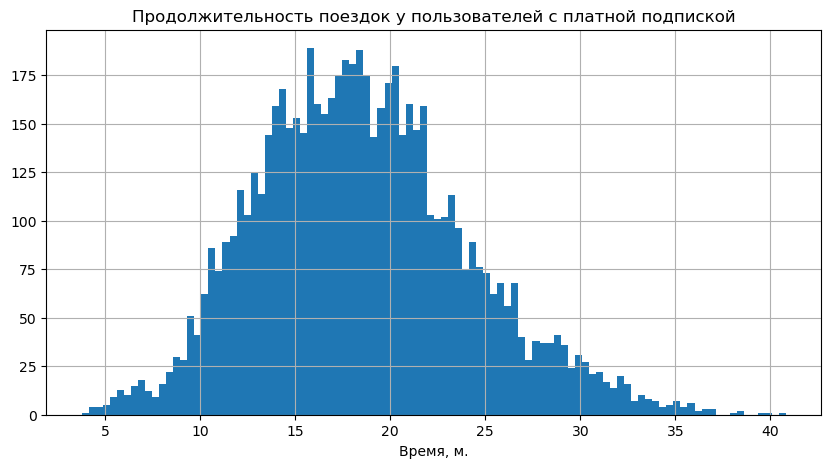

In [36]:
#визуализируем информацию о расстоянии и времени поездок для пользователей с платной подпиской
data_ultra['distance'].hist(bins=100, figsize = (10,5));
plt.title('Расстояние поездок у пользователей с платной подпиской');
plt.xlabel('Расстояние, м.');
plt.show()
data_ultra['duration'].hist(bins=100, figsize = (10,5));
plt.title('Продолжительность поездок у пользователей с платной подпиской');
plt.xlabel('Время, м.');

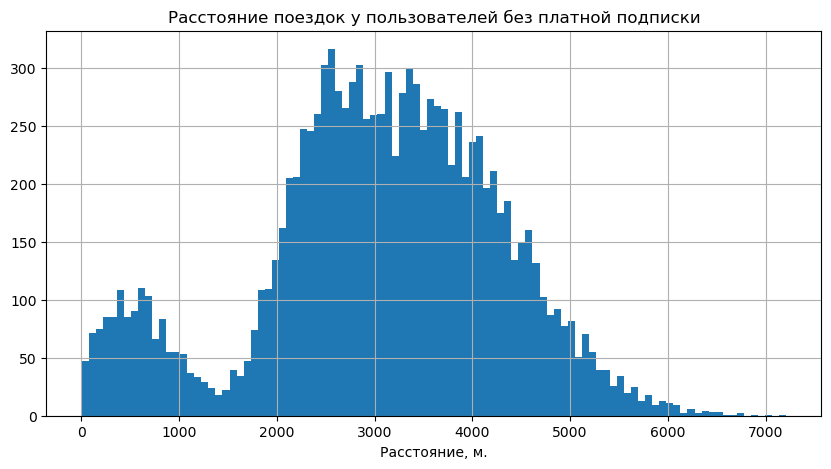

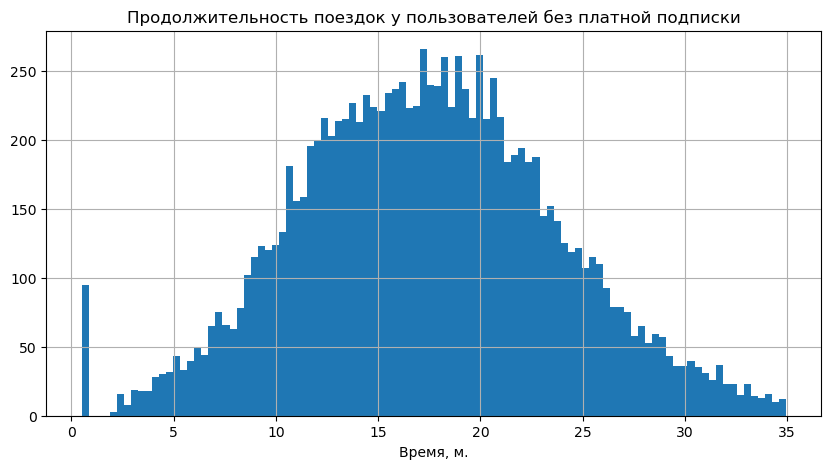

In [37]:
#визуализируем информацию о расстоянии и времени поездок для пользователей без подписки
data_free['distance'].hist(bins=100, figsize = (10,5));
plt.title('Расстояние поездок у пользователей без платной подписки');
plt.xlabel('Расстояние, м.');
plt.show()
data_free['duration'].hist(bins=100, figsize = (10,5));
plt.title('Продолжительность поездок у пользователей без платной подписки');
plt.xlabel('Время, м.');

In [38]:
data_free.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,0.500000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,12.000000,8.0,50.0,0.0


In [39]:
data_ultra.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,3.760353,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,12.000000,6.0,0.0,199.0


**Вывод:** Объединила данные о пользователях, поездках и подписках в один датафрейм. Создала ещё два датафрейма: c данными о пользователях без подписки и с данными о пользователях с подпиской.
Построила графики информации о расстоянии и времени поездок для пользователей обеих категорий.

Средний возраст пользователей с подпиской и без примерно одинаковый - около 25 лет. Дистанции проехали тоже примерно одинаково 3045 и 3115 метров. Продолжительность сессии похожа 17 и 18 минут.

#### Шаг 5. Подсчёт выручки

In [40]:
# Округление перед расчётами
data_result['duration'] = np.ceil(data_result['duration'])

In [41]:
#С помощью сводной таблицы создаем датафрейм с данными о поездках на основе датафрейма с объединёнными данными
data_pod = data_result.pivot_table(index=['user_id', 'month'], values = ['distance', 'duration', 'name', 'subscription_type'], aggfunc={'distance':'sum', 'duration':'sum', 'name':'count', 'subscription_type': 'min'})
#переименуем столбцы
data_pod.columns = ['total_distance', 'total_duration', 'trip_count', 'subscription_type']
data_pod.head(30)
#data_pod.reset_index(inplace=True)

total_distance  total_duration  trip_count subscription_type
user_id month                                                              
1       1         7027.511294            42.0           2             ultra
        4          754.159807             7.0           1             ultra
        8         6723.470560            46.0           2             ultra
        10        5809.911100            32.0           2             ultra
        11        7003.499363            56.0           3             ultra
        12        6751.629942            28.0           2             ultra
2       3        10187.723006            63.0           3             ultra
        4         6164.381824            40.0           2             ultra
        6         3255.338202            14.0           1             ultra
        7         6780.722964            48.0           2             ultra
        8          923.007439             7.0           1             ultra
        10        2824.636598            19.0           1             ultra
        12        3828.248580            12.0           1             ultra
3       1         3061.777147            13.0           1             ultra
        2         5421.152016            39.0           2             ultra
        4         2956.651632            21.0           1             ultra
        5         9064.026918            63.0           3             ultra
        7        10919.595403            67.0           3             ultra
        9         2891.012822            23.0           1             ultra
        12        2593.381928            13.0           1             ultra
4       2         6339.696747            49.0           2             ultra
        6         6753.041806            45.0           2             ultra
        7        10491.175555            56.0           3             ultra
        8         4649.488243            36.0           1             ultra
        10       13260.762274            79.0           4             ultra
        11        3343.025291            28.0           2             ultra
5       1         3914.646990            13.0           1             ultra
        2         2561.108241            12.0           1             ultra
        3        10633.732186            57.0           3             ultra
        4         3373.080412            15.0           1             ultra

In [43]:
# Помесячная выручка считается по формуле:
#     (стоимость старта поездки × количество поездок) + 
#     (стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) +
#     (стоимость подписки)
# ---------------------------
# (50 * trip_count) +
# (6 или 8 * total_duration) +
# 199
data_pod["subscription_type"].value_counts()

free     6798
ultra    4533
Name: subscription_type, dtype: int64

In [44]:
# 1 - Помесячная выручка для тех у кого есть подписка
data_pod.loc[data_pod["subscription_type"] == 'ultra', "revenue"] = (6 * data_pod["total_duration"]) + 199

In [45]:
# 2 - Помесячная выручка для тех у кого НЕТ подписки
data_pod.loc[data_pod["subscription_type"] == 'free', "revenue"] =  (50 * data_pod["trip_count"]) + (8 * data_pod["total_duration"])

In [46]:
data_pod

total_distance  total_duration  trip_count subscription_type  \
user_id month                                                                 
1       1         7027.511294            42.0           2             ultra   
        4          754.159807             7.0           1             ultra   
        8         6723.470560            46.0           2             ultra   
        10        5809.911100            32.0           2             ultra   
        11        7003.499363            56.0           3             ultra   
...                       ...             ...         ...               ...   
1534    6         3409.468534            26.0           2              free   
        8         7622.453034            48.0           2              free   
        9         4928.173852            23.0           1              free   
        11       13350.015305            78.0           4              free   
        12        2371.711192            16.0           1              free   

               revenue  
user_id month           
1       1        451.0  
        4        241.0  
        8        475.0  
        10       391.0  
        11       535.0  
...                ...  
1534    6        308.0  
        8        484.0  
        9        234.0  
        11       824.0  
        12       178.0  

[11331 rows x 5 columns]

**Вывод:** Нашла суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. В этот же датафрейм добавила новый столбец с помесячной вырочкой для клиентов с подпиской и без. 

#### Шаг 6. Проверка гипотез

6.1 
Сформируем нулевую гипотезу - потраченное время пользователей с подпиской и пользователей без подписки равно.

Альтернативная гипотеза - потраченное время пользователей с подпиской больше чем, у пользователей без подписки.

Для проверки гипотезы используем scipy.stats.ttest_ind, так как имеем две независимые генеральные совокупности.

In [47]:
alpha = 0.05
 
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative = 'greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу.


**Вывод:** Средняя продолжительность аренды у пользователей с подпиской: 18.54 минут, а у пользователей без подписки 17.39 минут. В среднем пользователи с подпиской арендуют самокат на 1.15 минут больше, чем пользователи без подписки.

6.2
Сформируем нулевую гипотезу - пользователи с подпиской проезжают за одну поездку не больше 3130 метров.

Альтернативная гипотеза - пользователи с подпиской проезжают за одну поездку больше 3130 метров.

Для проверки гипотезы используем  st.ttest_1samp, так как нужно расчитать p-value одной выборки и сравнить его с ожидаемым значением.

In [48]:
optimal = 3130
alfa = 0.05

results = st.ttest_1samp(
    data_ultra['duration'], 
    optimal,
      alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue > alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.0
Не отвергаем нулевую гипотезу


**Вывод:** В среднем пользователи с подпиской проезжают 3115.45 метров

6.3
Сформируем нулевую гипотезу - средняя выручка пользователей с подпиской и пользователей без подписки равна.

Альтернативная гипотеза - средняя выручка пользователей с подпиской выше, чем у пользователей без подписки.

Для проверки гипотезы используем scipy.stats.ttest_ind, так как имеем две независимые генеральные совокупности.

In [49]:
alfa = 0.05

results = st.ttest_ind(data_pod.loc[data_pod["subscription_type"] == 'ultra']['revenue'], data_pod.loc[data_pod["subscription_type"] == 'free']['revenue'], alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу.


**Вывод:** В среднем в месяц пользователи с подпиской тратят на аренду самокатов 362.79 руб , а пользователи без подписки 328.64 руб
В среднем пользователи с подпиской приносят компании на 34.15 руб больше, чем пользователи без платной подписки

In [50]:
data_pod.loc[data_pod["subscription_type"] == 'ultra']['revenue'].describe()

count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: revenue, dtype: float64

In [51]:
data_pod.loc[data_pod["subscription_type"] == 'free']['revenue'].describe()

count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: revenue, dtype: float64

6.4
Для решения подобной задачи подойдет проверка гипотезы о равенстве средних для зависимых выборок.
Решить такую задачу можно методом scipy.stats.ttest_rel()


**Общий вывод:**
    В ходе проекта я выполнила данные задачи: загрузила данные и выполнила предобработку. 
- Данные показали, **data** - в загруженном фрейме отсутствуют пропущенные значения. Типы данных соответсвуют содержанию. **data_2** - в загруженном фрейме отсутствуют пропущенные значения. Колонка date имеет тип object. Это не совсем не соответствует содержанию. Тип данных будет изменён позже, в ходе работы над проектом. **data_3** - совсем мальникий набор данных. Пропусков в данных не было, а дубликаты были удалены.
- Исследование показало, больше всего пользователей самокатов в городе Пятигорск, далее Екатеринбург и 3-е место Ростов на Дону.
    Как видим на графике, пользователей без подписки немного больше половины - **54%(835 польз.)** против **45%(699 пользователей с подпиской ultra)**.
    Больше всего пользовтелей самокатов в городе Пятигорске, Екатеринбурге и Ростове на Дону. Средний возраст пользователей с подпиской и без примерно одинаковый - около 25 лет. Дистанции проехали тоже примерно одинаково 3045 и 3115 метров. Продолжительность сессии 17 и 18 минут.
- Далее я нашла суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. В этот же датафрейм добавила новый столбец с помесячной вырочкой для клиентов с подпиской и без.

- В заключительной части сформулированы и проверены гипотезы выяснила, что средняя продолжительность аренды у пользователей с подпиской: **18.54** минут, а у пользователей без подписки **17.39 минут**. В среднем пользователи с подпиской арендуют самокат на **1.15 минут** больше, чем пользователи без подписки. Также пользователи с подпиской проезжают **3115.45** метров. В среднем в месяц пользователи с подпиской тратят на аренду самокатов **362.79 руб** , а пользователи без подписки **328.64** руб В среднем пользователи с подпиской приносят компании на **34.15 руб** больше, чем пользователи без платной подписки.

   
   Исходя из данных можно сказать, что число пользователей с подпиской и без не сильно отличаются. Но пользователи с подпиской приносят прибыли больше. И пользуются самокатами чуть чаще. 